# Modela la ecuación de regresión lineal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('coin_Bitcoin.csv')

df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


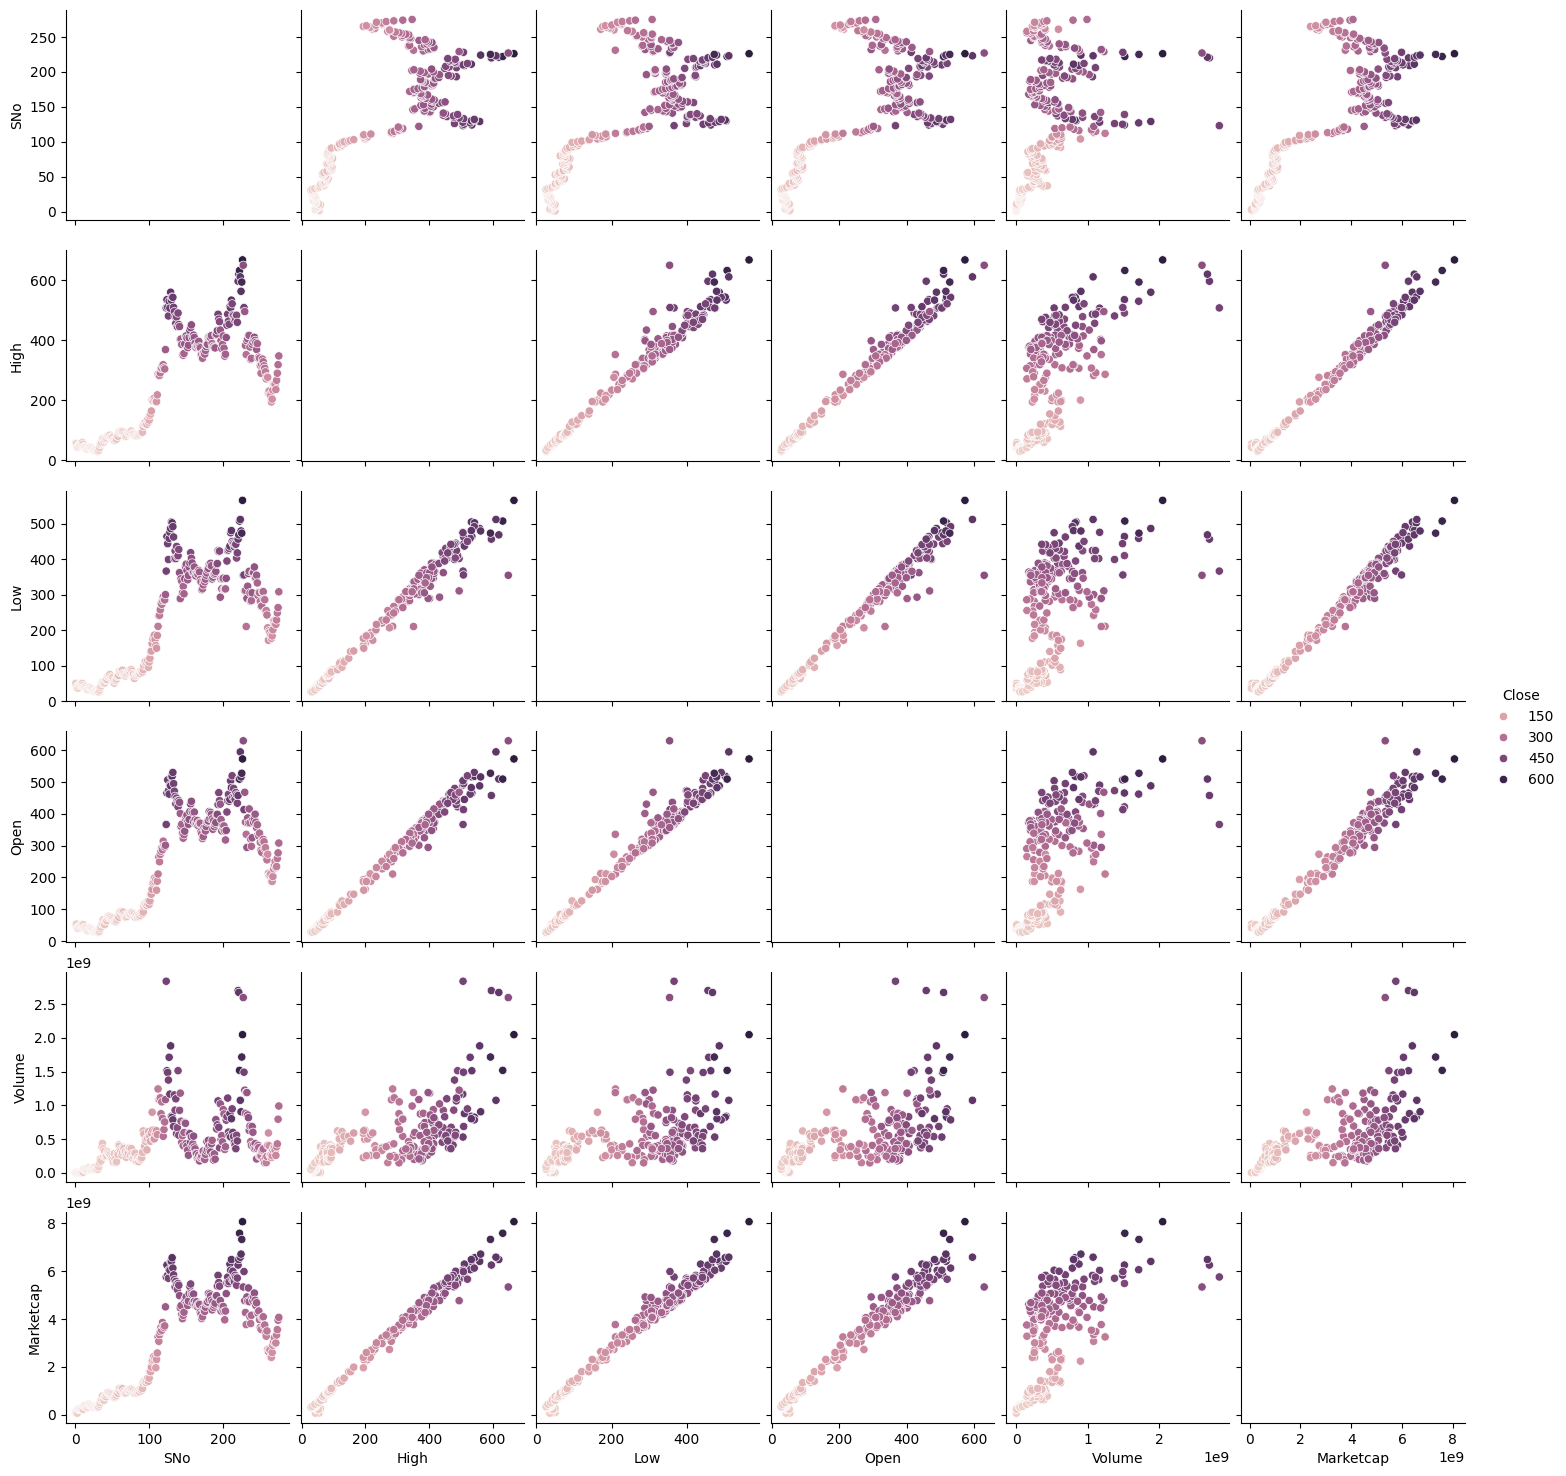

In [ ]:
import seaborn as sns

sns.pairplot(df, hue="Close")
plt.show()

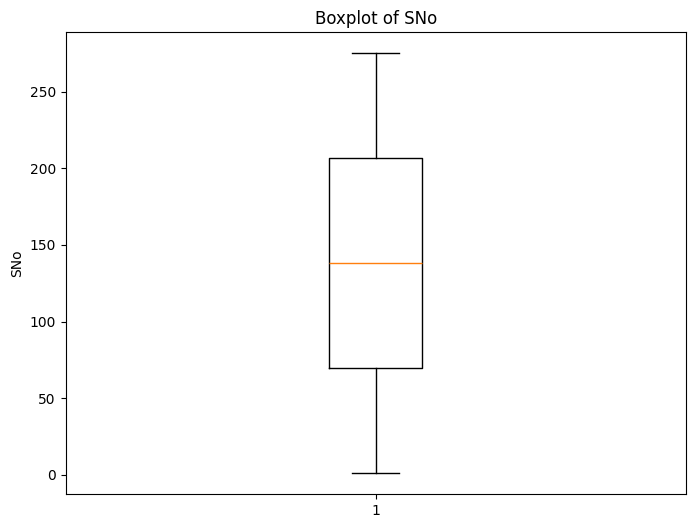

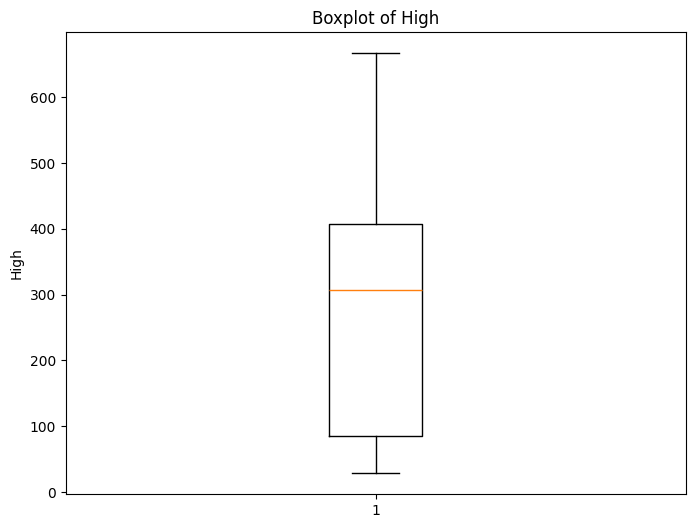

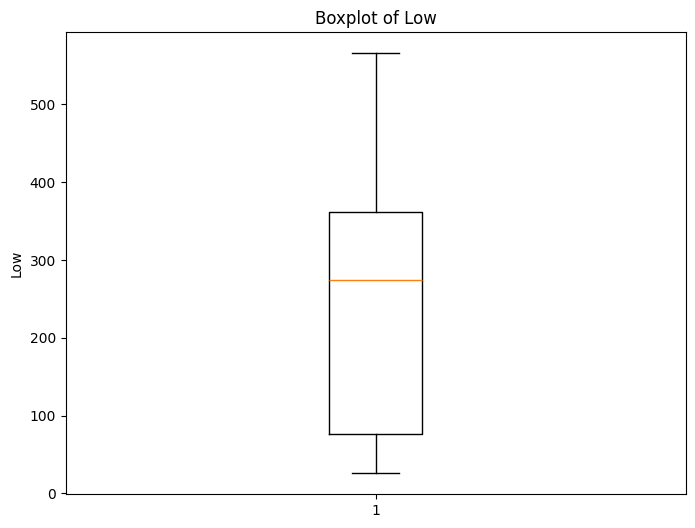

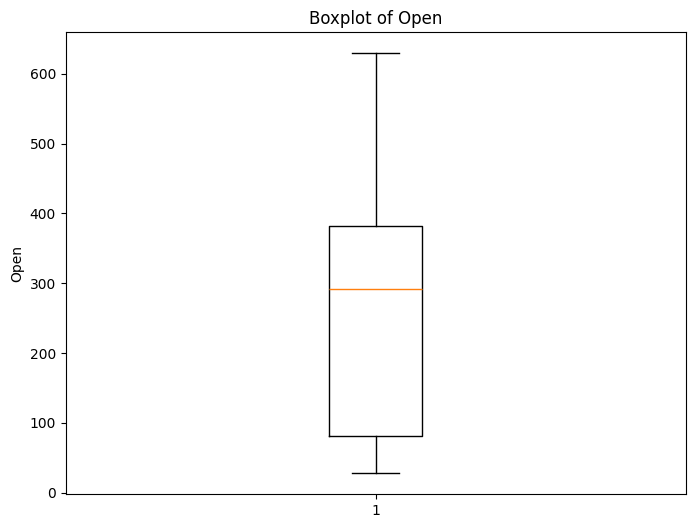

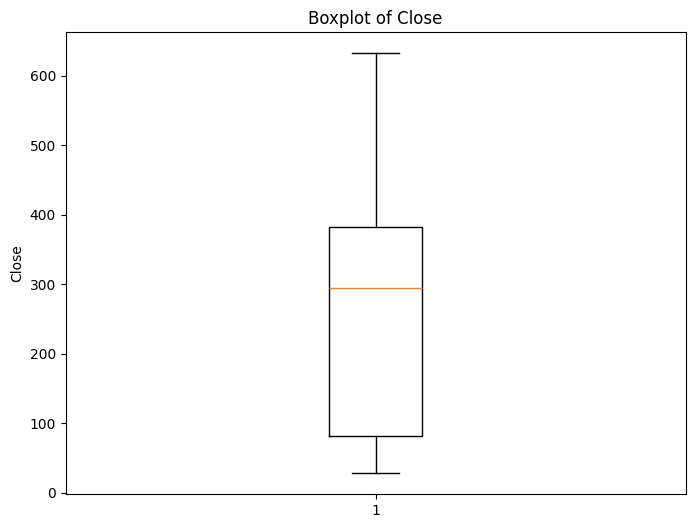

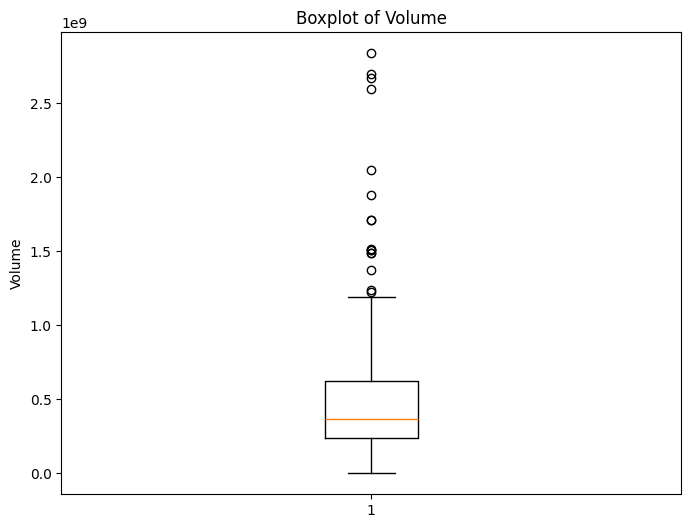

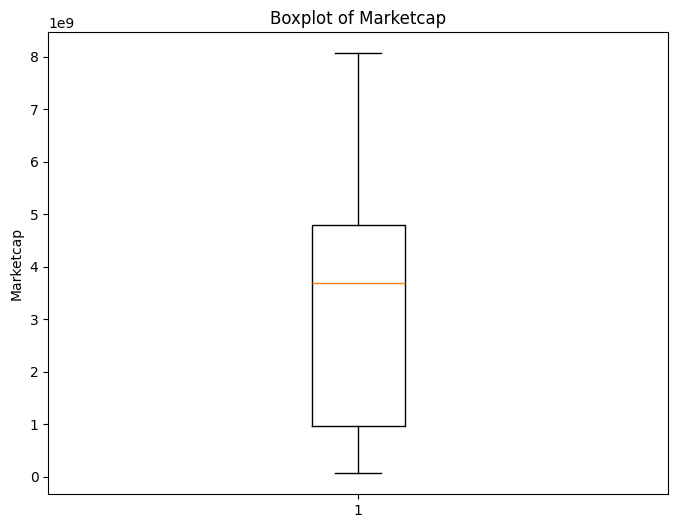

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[col].dropna())
  plt.title(f'Boxplot of {col}')
  plt.ylabel(col)
  plt.show()

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 202.76386062854104
R-squared: 0.9924568961610558


In [ ]:
coeficientes = model.coef_
interseccion = model.intercept_

print("Ecuación de regresión:")
print(f"Close = ({interseccion:.2f}) + ({coeficientes[0]:.2f} * Open) + ({coeficientes[1]:.2f} * High) + ({coeficientes[2]:.2f} * Low) + ({coeficientes[3]:.2f} * Volume)")

Ecuación de regresión:
Close = (3.35) + (-0.44 * Open) + (0.73 * High) + (0.70 * Low) + (-0.00 * Volume)


##  probablemente Volume no esta afectando al modelo

In [ ]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coeficientes = model.coef_
interseccion = model.intercept_

print("Ecuación de regresión:")
print(f"Close = ({interseccion:.2f}) + ({coeficientes[0]:.2f} * Open) + ({coeficientes[1]:.2f} * High) + ({coeficientes[2]:.2f} * Low)")#modelo sin Volume

Ecuación de regresión:
Close = (3.35) + (-0.44 * Open) + (0.73 * High) + (0.70 * Low)


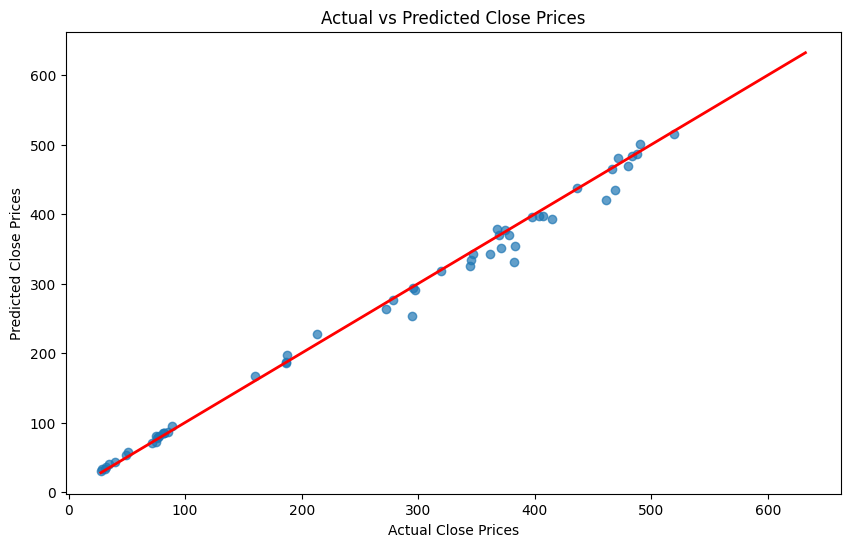

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.show()

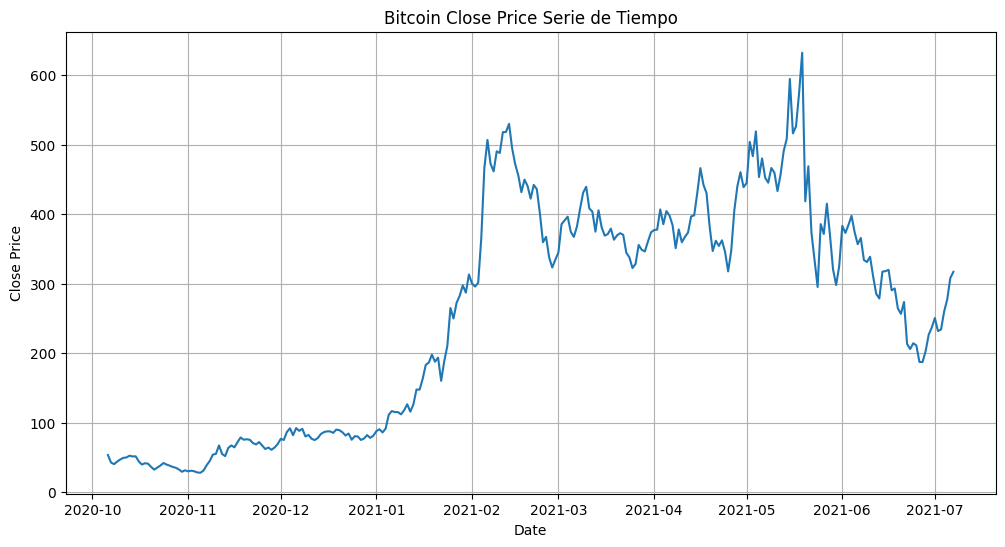

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Serie de Tiempo')
plt.grid(True)
plt.show()


# **PROPUESTAS DE SOLUCIÓN PARA EL ANÁLISIS DE UNA SERIE DE TIEMPO CON REGRESIÓN LINEAL**


##   Dependencia temporal, autocorrelación, estacionariedad y predicción




Ahora vamos a verificar si la serie de tiempo es estacionaria o no

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Close'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -1.4936697567453596
p-value: 0.5366404631462426


Como el p-values fue mayor a 0.5 significa que la serie no es estacionaria, además la serie tiene una tendencia fuerte y tal vez su varianza no sea constante en el tiempo.,

In [ ]:
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True)

Ahora analizamos la autocorrelación para ver si hay patrones en el tiempo

<Figure size 1200x500 with 0 Axes>

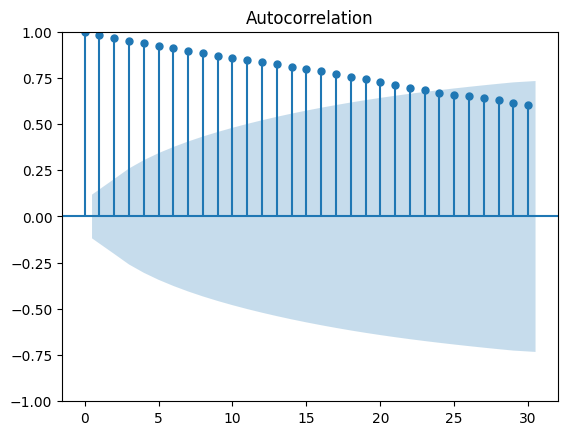

<Figure size 1200x500 with 0 Axes>

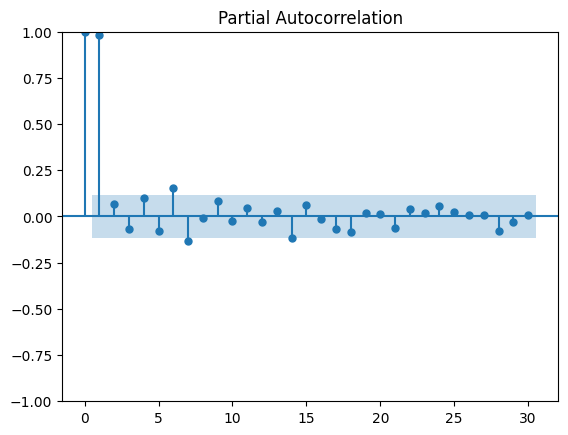

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df['Close'].dropna(), lags=30)
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Close'].dropna(), lags=30)
plt.show()

Del primer gráfico el eje x representa los lags y el eje Y, la correlación la zona sombreada repsresenta el intervalo de confianza, los valores dentro de esta región no son significativos, entonces podemos decir que la serie tiene una autocorrelación muy fuerte a pesar de los lags altos, que son los que están cerca del 1.
También no cae rápidamente por eso no es estacionaria
Y el precio del bitcoin actual depende de valores históricos, osea muy del pasado por eso tiene una estructura de largo plazo en la serie.


En el gráfico 2, se muestra una correlación entre el precio actual y un valor pasado, podemos notar que solo los primeros dos rezagos son significativos , osea que hay dos picos altos al inicio y luego los valores caen dentro del intervalo de confianza

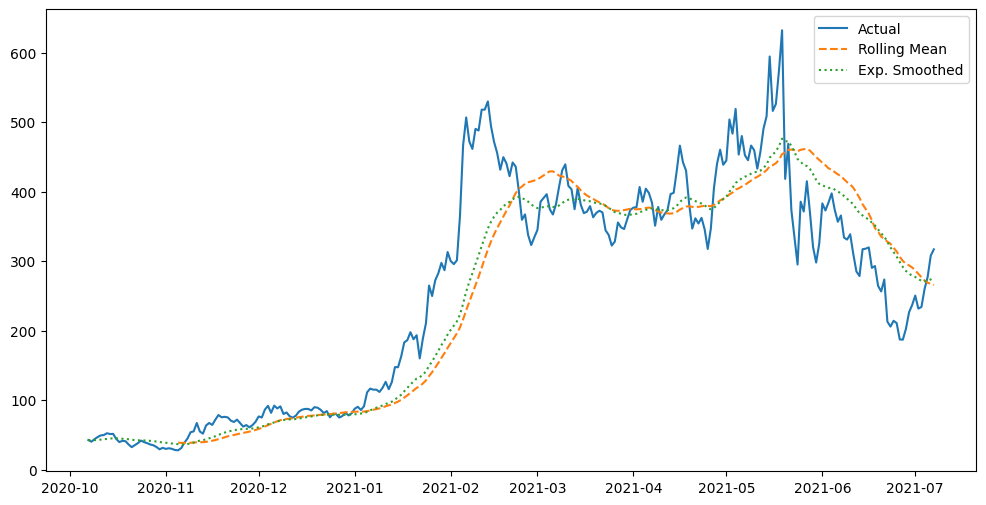

In [ ]:
#Esto es solopara ver la media móvil y checar si hay tendencias
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Exp Smoothed'] = df['Close'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual')
plt.plot(df['Rolling Mean'], label='Rolling Mean', linestyle='dashed')
plt.plot(df['Exp Smoothed'], label='Exp. Smoothed', linestyle='dotted')
plt.legend()
plt.show()

Lo que podemos interpretar es que desde 2013 hasta 2017 el precio de bitcoin fue relativamente estable, entre 2017 y 2018 hay un gran pico cerca de 20000, y después se desploma, posteriormente a partir del 2020-2021, hay un pico más grande que supera los $60,000 y después se desploma drásticamente. A resumidas cuentas podemos decir que el bitcoin es muy volátil porque tiene periodos de crecimiento muy altos pero con caidas fuertes.

In [ ]:
#dependencia temporal
df['Close_lag1'] = df['Close'].shift(1)  # Precio de cierre del día anterior
df['Close_lag2'] = df['Close'].shift(2)  # Precio de cierre hace dos días
df.dropna(inplace=True)

Esto permite que el modelo considere la relación entre el precio de hoy y el de dias anteriores

In [ ]:
#predicción
X = df[['Close_lag1', 'Close_lag2']]  # Variables predictoras
y = df['Close']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción para el siguiente día
ultimo_dato = X.iloc[-1].values.reshape(1, -1)  # Última observación
prediccion = model.predict(ultimo_dato)
print(f'Predicción del próximo día: {prediccion[0]}')

Predicción del próximo día: 312.32700051247275


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Tratamos de predecir el valor siguiente usando los rezagos

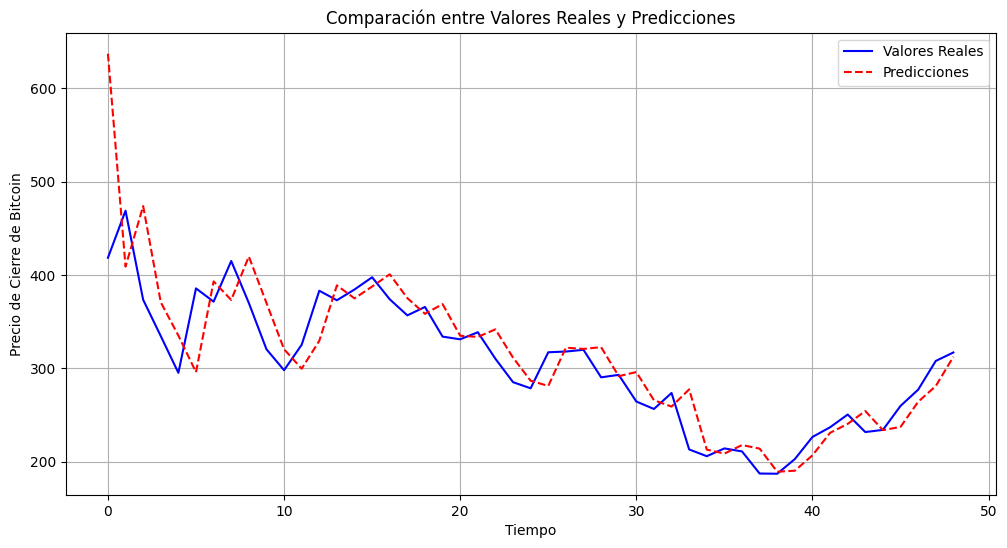

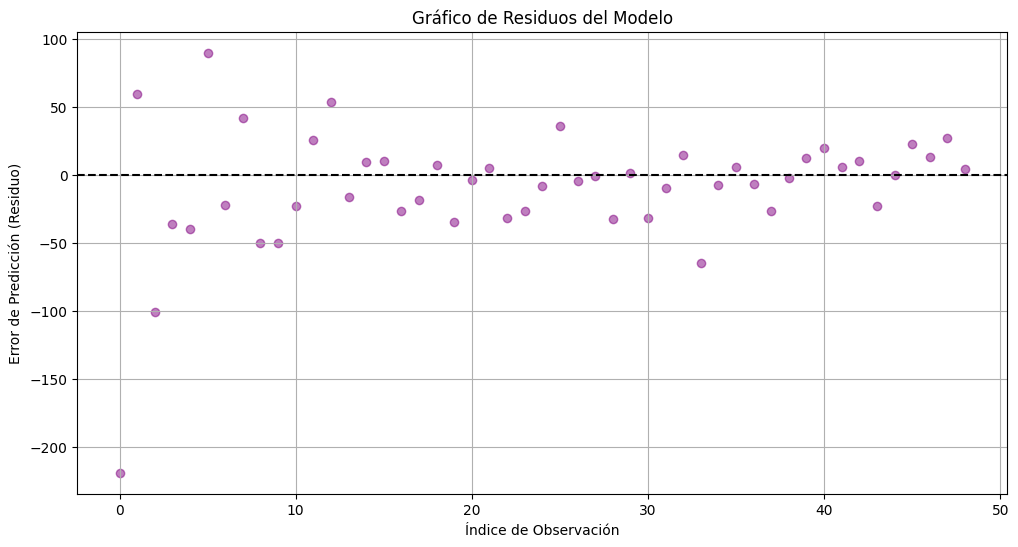

Text(0, 0.5, 'Precio Estimado de B')

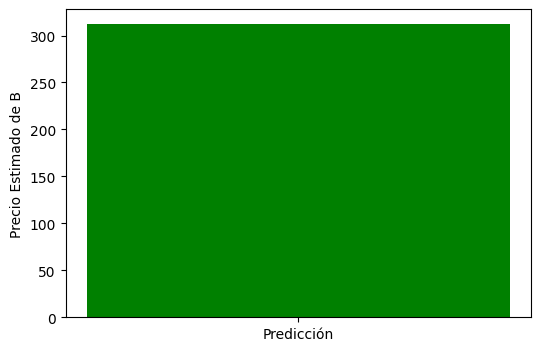

In [ ]:
import matplotlib.pyplot as plt

# Predicciones del modelo
y_pred = model.predict(X_test)

# Gráfico 1: Valores Reales vs Predicciones
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Valores Reales", color="blue", linestyle="-")
plt.plot(y_pred, label="Predicciones", color="red", linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("Precio de Cierre de Bitcoin")
plt.title("Comparación entre Valores Reales y Predicciones")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Residuos del modelo
residuos = y_test.values - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuos)), residuos, color="purple", alpha=0.5)
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Índice de Observación")
plt.ylabel("Error de Predicción (Residuo)")
plt.title("Gráfico de Residuos del Modelo")
plt.grid(True)
plt.show()

# Gráfico 3: Predicción del siguiente día
plt.figure(figsize=(6, 4))
plt.bar(["Predicción"], [prediccion[0]], color="green")
plt.ylabel("Precio Estimado de B")

El priemr gráfico muestra cómo se comparan las predicciones del modelo con los valores reales de prueba. La línea azul representa los valores reales y la línea roja discontinua las predicciones.

El segundo gráfico, representa los errores de predicción (diferencia entre valores reales y predichos).
Si los residuos están bien distribuidos alrededor de 0, significa que el modelo es bueno.

El tecer gráfico, muestra la predicción del modelo para el siguiente día como un gráfico de barras para poder ver el valor estimado.

# c. Modelos de series de tiempo autorregresivos y el modelo ARIMA.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Ordenar los datos por fecha
df = df.sort_index()

# Seleccionar la serie temporal de precios de cierre
close_prices = df['Close']

# Prueba de estacionariedad con ADF (Dickey-Fuller)
adf_test = adfuller(close_prices)
adf_test

(-0.7973098451195595,
 0.8199110033239155,
 29,
 2961,
 {'1%': -3.4325603944919445,
  '5%': -2.8625166073924957,
  '10%': -2.567289874591689},
 45929.032374699236)

El test de Dickey-Fuller para estacionariedad da los siguientes resultados:

Estadístico ADF: -0.7973

p-valor: 0.8199

Valores críticos:

1%: -3.4326

5%: -2.8625

10%: -2.5673

Dado que el p-valor es mayor que 0.05, no podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria. Esto significa que la serie no es estacionaria y necesita diferenciación antes de aplicar un modelo autoregresivo.

Despues de analizar que la serie de tiempo no es estacionaria se aplica el modelo AR

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo AR (p,0,0) a la serie diferenciada
p = 5  # Se puede ajustar con criterio AIC/BIC, pero probamos con 5 lags inicialmente
model_ar = ARIMA(close_prices, order=(p, 0, 0))
result_ar = model_ar.fit()

# Resumen del modelo
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2991
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -23303.019
Date:                Mon, 17 Mar 2025   AIC                          46620.038
Time:                        04:33:57   BIC                          46662.062
Sample:                             0   HQIC                         46635.156
                               - 2991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6711.2904     16.255    412.866      0.000    6679.430    6743.150
ar.L1          0.9301      0.007    131.426      0.000       0.916       0.944
ar.L2          0.1374      0.009     15.531      0.000       0.120       0.155
ar.L3         -0.0284      0.010     -2.874      0.004      -0.048      -0.009
ar.L4         -0.0076      0.008     -0.943      0.345      -0.023       0.008
ar.L5         -0.0320      0.006     -5.664      0.000      -0.043      -0.021
sigma2      3.423e+05   2032.606    168.422      0.000    3.38e+05    3.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            195702.34
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):            1302.77   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+18. Standard errors may be unstable.
"""

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Usar auto_arima para encontrar los mejores valores de (p,d,q)
model_auto = auto_arima(close_prices, seasonal=False, stepwise=True, trace=True)

# Mostrar los parámetros óptimos
model_auto.order

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=46597.301, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46623.430, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46610.172, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46612.085, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46622.553, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=46595.377, Time=1.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=46597.611, Time=0.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46604.547, Time=1.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=46597.429, Time=2.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=46597.147, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=46595.665, Time=1.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=46597.957, Time=4.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=46593.600, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=46596.734, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=46603.664, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=46595.504, Time=0.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=46595.555, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=46611.360, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=46596.214, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=46593.571, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=46597.889, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=46595.520, Time=0.80 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=46609.466, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=46595.817, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=46597.250, Time=1.48 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 20.705 seconds


(2, 1, 1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA(1,1,1)
model_arima = ARIMA(close_prices, order=(1, 1, 1))
result_arima = model_arima.fit()

# Resumen del modelo
result_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2991
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23298.832
Date:                Mon, 17 Mar 2025   AIC                          46603.664
Time:                        04:35:41   BIC                          46621.673
Sample:                             0   HQIC                         46610.143
                               - 2991                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5691      0.052    -10.934      0.000      -0.671      -0.467
ma.L1          0.4969      0.056      8.883      0.000       0.387       0.607
sigma2      3.446e+05   1968.830    175.007      0.000    3.41e+05    3.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):            200391.31
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):            1458.53   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Resultados del modelo ARIMA(1,1,1)

Coeficientes clave:


AR(1) = -0.5691 (negativo, indica que el precio tiende a revertirse en el corto plazo).
MA(1) = 0.4969 (positivo, muestra el efecto de ruido pasado en el modelo).

Varianza del error (σ2): 344600 (grande, indica volatilidad significativa).

Evaluación del modelo:


AIC: 46603.66 (usado para comparación con otros modelos).

BIC: 46621.67.

Ljung-Box Test: No hay autocorrelación significativa en los residuos (Prob(Q) = 0.77).

Jarque-Bera Test: La distribución de los residuos no es normal.

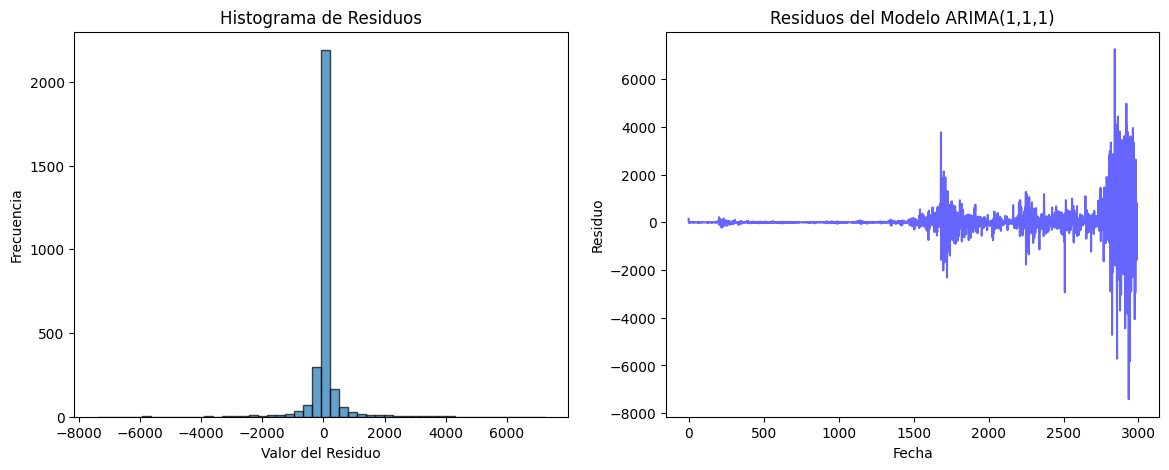

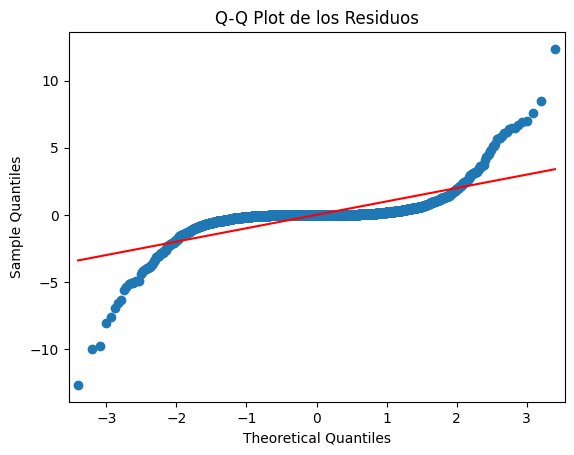

In [ ]:
# Graficar los residuos del modelo ARIMA(1,1,1)
residuals = result_arima.resid

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de residuos
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title("Histograma de Residuos")
axes[0].set_xlabel("Valor del Residuo")
axes[0].set_ylabel("Frecuencia")

# Gráfico de residuos en el tiempo
axes[1].plot(residuals, color='blue', alpha=0.6)
axes[1].set_title("Residuos del Modelo ARIMA(1,1,1)")
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("Residuo")

plt.show()

# Prueba de normalidad de los residuos con Q-Q plot
sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot de los Residuos")
plt.show()


En el histograma observamos:

La distribución de los residuos no es perfectamente normal, hay cierta asimetría.

Parece haber colas más pesadas de lo esperado, lo que indica posibles eventos extremos o volatilidad alta.

Residuos en el tiempo:

Se observa cierta variabilidad en los residuos a lo largo del tiempo, pero sin una tendencia clara.

Sin embargo, hay períodos donde los residuos son más grandes, lo que sugiere cambios en la volatilidad.

Q-Q Plot:

La mayoría de los puntos siguen la línea diagonal, pero hay desviaciones en las colas, lo que confirma que los residuos no son completamente normales.

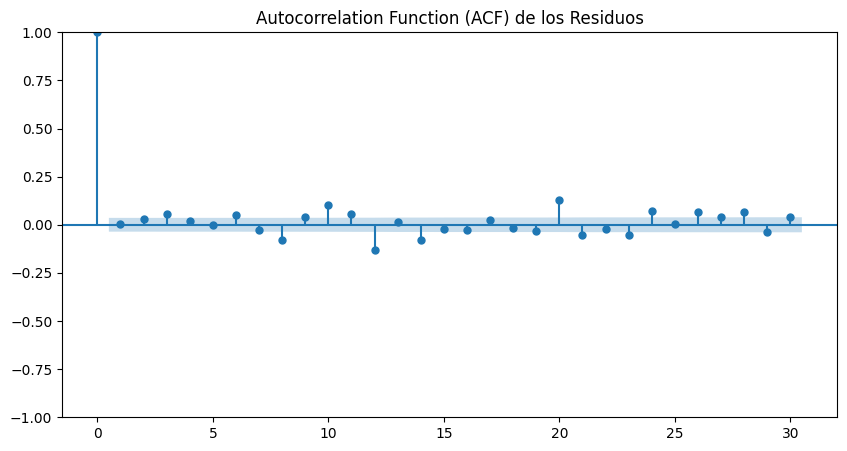

In [ ]:
# Graficar la Función de Autocorrelación (ACF) de los residuos
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax)
ax.set_title("Autocorrelation Function (ACF) de los Residuos")
plt.show()

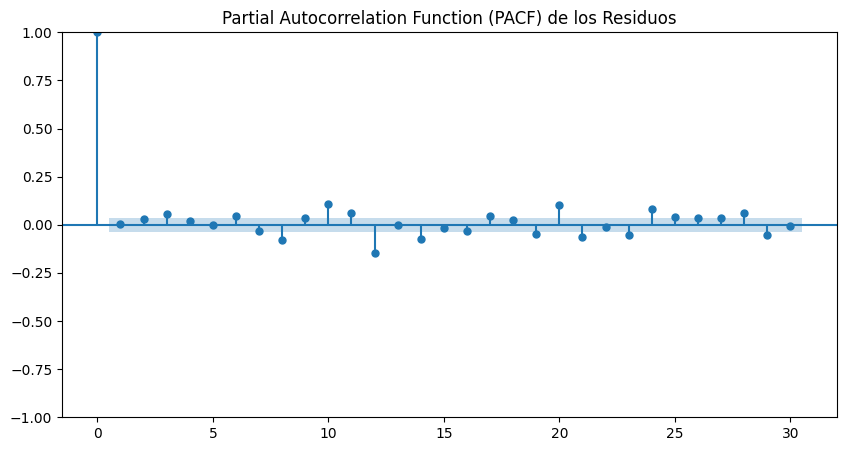

In [ ]:
# Graficar la Función de Autocorrelación Parcial (PACF) de los residuos
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax, method='ywm')
ax.set_title("Partial Autocorrelation Function (PACF) de los Residuos")
plt.show()
